# Segmentation and regionprops

In [2]:
import skimage
skimage.__version__

'0.15.0'

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from skimage import data
coins = data.coins()

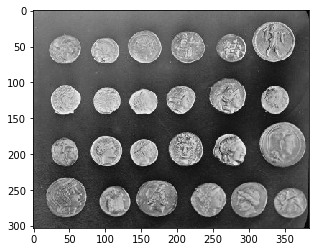

In [4]:
plt.imshow(coins, cmap='gray');

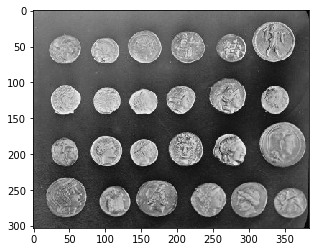

In [12]:
from skimage import util; 
coins = util.img_as_float(coins);
plt.imshow(coins, cmap='gray');

C:\Users\Angel\Anaconda3\envs\tensorflowGPU\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


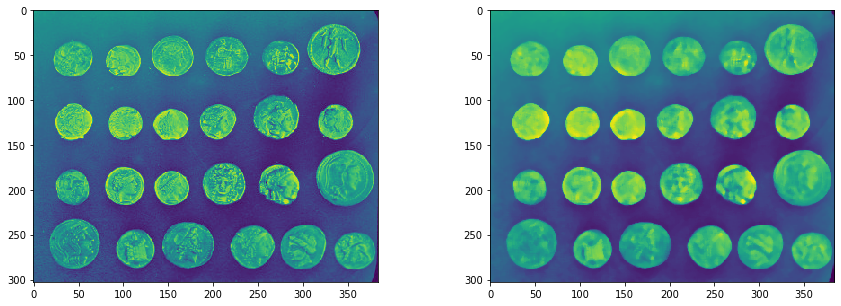

In [13]:
from skimage import filters

coins_denoised = filters.median(coins, selem=np.ones((5, 5)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.imshow(coins)
ax1.imshow(coins_denoised);

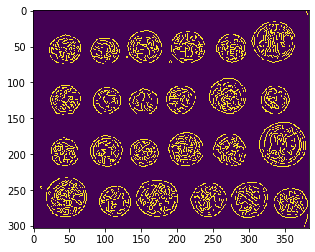

In [55]:
from skimage import feature
edges = skimage.feature.canny(coins, sigma=1)

plt.imshow(edges);

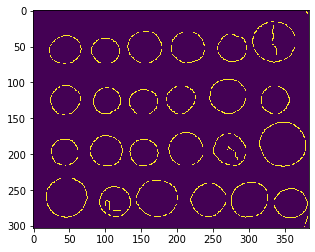

In [31]:
from skimage import feature
edges = skimage.feature.canny(coins, sigma=3)

plt.imshow(edges);

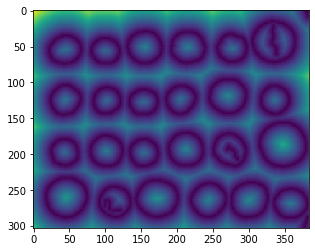

In [32]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.imshow(dt);

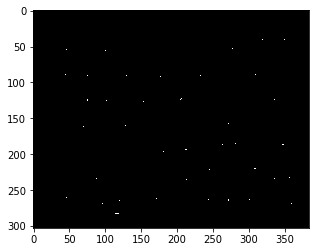

In [33]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=5)
plt.imshow(local_max, cmap='gray');

In [34]:
peak_idx = feature.peak_local_max(dt, indices=True, min_distance=5)
peak_idx[:5]

array([[283, 117],
       [283, 116],
       [283, 115],
       [283, 114],
       [283, 113]], dtype=int64)

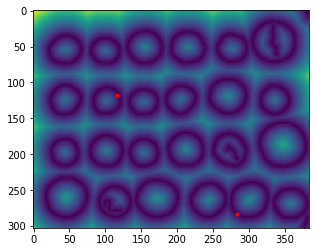

In [35]:
plt.plot(peak_idx[1], peak_idx[0], 'r.')
plt.imshow(dt);

In [36]:
from skimage import measure

markers = measure.label(local_max)

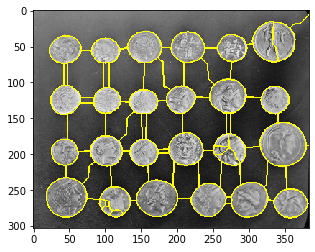

In [37]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(coins, labels));

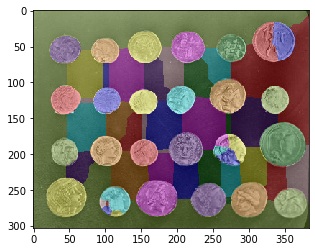

In [38]:
from skimage import color
plt.imshow(color.label2rgb(labels, image=coins));

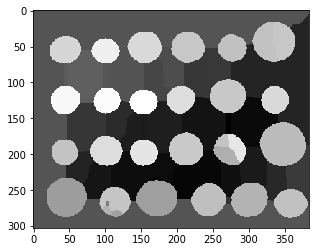

In [39]:
plt.imshow(color.label2rgb(labels, image=coins, kind='avg'), cmap='gray');

In [40]:
regions = measure.regionprops(labels, intensity_image=coins)

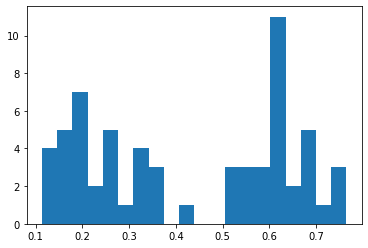

In [41]:
region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);

In [42]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)

[[0.62357197]
 [0.22540487]]


In [43]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

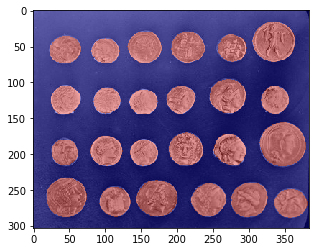

In [45]:
plt.imshow(color.label2rgb(classified_labels, image=coins));

### Prueba con grano de polen

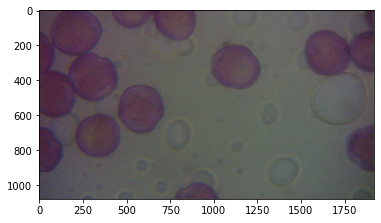

In [2]:
import skimage
skimage.__version__
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

image = plt.imread('Muestra10.jpg')
plt.imshow(image);

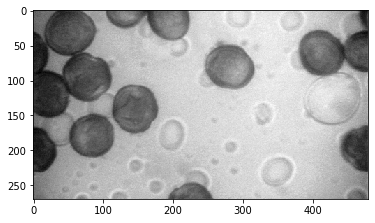

In [3]:
import cv2
from skimage.color import rgb2gray
image=cv2.resize(image,(480,270))#resize image
gray = rgb2gray(image)
from skimage import util; 
image = util.img_as_float(gray);
plt.imshow(image, cmap='gray');

C:\Users\Angel\Anaconda3\envs\tensorflowGPU\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


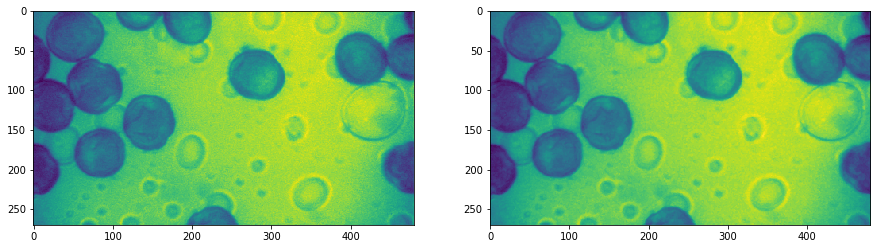

In [4]:
from skimage import filters

image_denoised = filters.median(image, selem=np.ones((2, 2)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.imshow(image)
ax1.imshow(image_denoised);

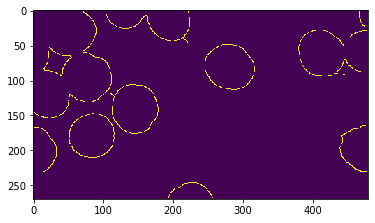

In [8]:
from skimage import feature
edges = skimage.feature.canny(image, sigma=1)

plt.imshow(edges);

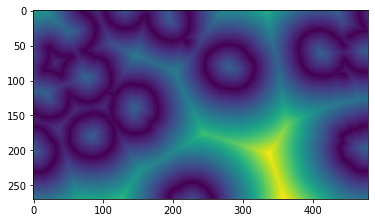

In [9]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.imshow(dt);

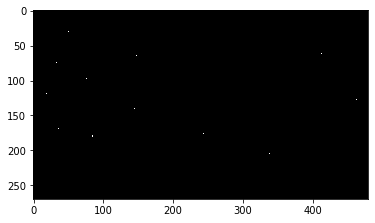

In [10]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=5)
plt.imshow(local_max, cmap='gray');

In [11]:
peak_idx = feature.peak_local_max(dt, indices=True, min_distance=5)
peak_idx[:5]

array([[211, 187],
       [205, 338],
       [180,  85],
       [179,  85],
       [176, 244]], dtype=int64)

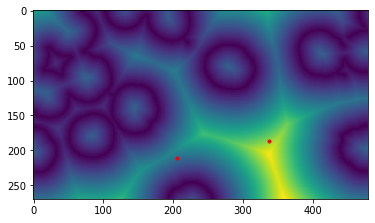

In [12]:
plt.plot(peak_idx[1], peak_idx[0], 'r.')
plt.imshow(dt);

In [13]:
from skimage import measure

markers = measure.label(local_max)

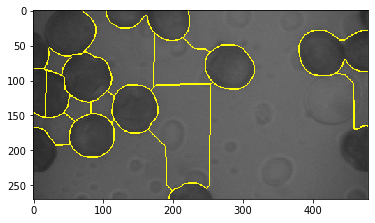

In [14]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(image, labels));

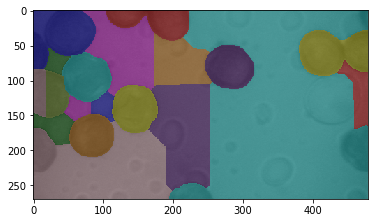

In [15]:
from skimage import color
plt.imshow(color.label2rgb(labels, image=image));

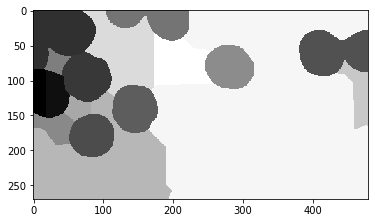

In [16]:
plt.imshow(color.label2rgb(labels, image=image, kind='avg'), cmap='gray');

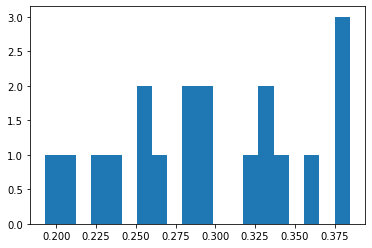

In [17]:
regions = measure.regionprops(labels, intensity_image=image)
region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)

[[0.35223735]
 [0.25400254]]


In [19]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [20]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

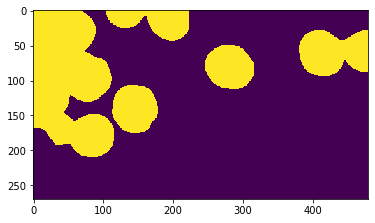

In [21]:
plt.imshow(classified_labels);

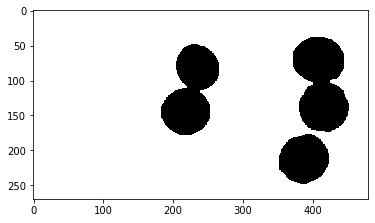

In [19]:
plt.imshow(color.label2rgb(classified_labels, image=image, kind='avg'), cmap='gray');